In [16]:
import pandas as pd
import seaborn as sns

df = pd.read_csv("results/matching_result.csv")
data_male = pd.read_csv("dataset/male.csv")
data_female = pd.read_csv("dataset/female.csv")
data_male_pref_rank = pd.read_csv("results/male_pref_rank.csv")
data_female_pref_rank = pd.read_csv("results/female_pref_rank.csv")

df["Male_inc"] = data_male["V_inc"]
df["Male_apr"] = data_male["V_apr"]
df["Male_age"] = data_male["V_age"]
df["Male_per"] = data_male["V_per"]

df = df.sort_values("Female_idx").reset_index(drop=True)
df["Female_inc"] = data_female["V_inc"]
df["Female_apr"] = data_female["V_apr"]
df["Female_age"] = data_female["V_age"]
df["Female_per"] = data_female["V_per"]

df = df.merge(data_male_pref_rank, on="Male_idx")
df = df.merge(data_female_pref_rank, on="Female_idx")

,Male_idx,Female_idx,Male_inc,Male_apr,Male_age,Male_per,Female_inc,Female_apr,Female_age,Female_per,Male_pref_rank,Female_pref_rank
0,31,0,2,5,4,0.900496,4,5,8,9.854610,48,45
1,18,1,1,5,8,3.828294,4,7,8,6.579325,40,16
2,24,2,4,7,2,1.567474,4,7,2,0.397983,1,1
3,7,3,1,5,2,6.111318,1,6,2,5.782236,3,10
4,26,4,4,5,8,8.657290,4,9,6,9.398078,8,6
5,48,5,6,5,2,0.316691,1,6,10,9.643351,49,49
6,20,6,1,6,2,3.804080,4,6,4,9.806332,42,32
7,41,7,6,4,3,4.173223,4,2,4,3.670417,24,8
8,1,8,2,7,2,3.624226,2,5,3,3.470117,8,5
9,40,9,2,7,8,8.374348,2,6,3,8.459762,9,19


/var/folders/c1/4qwvbdwd2yx4ht7qk_0_7nzh0000gq/T/ipykernel_50928/2123311787.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_corr.loc[:, columns_to_negate] = -df_for_corr.loc[:, columns_to_negate]


<Axes: >

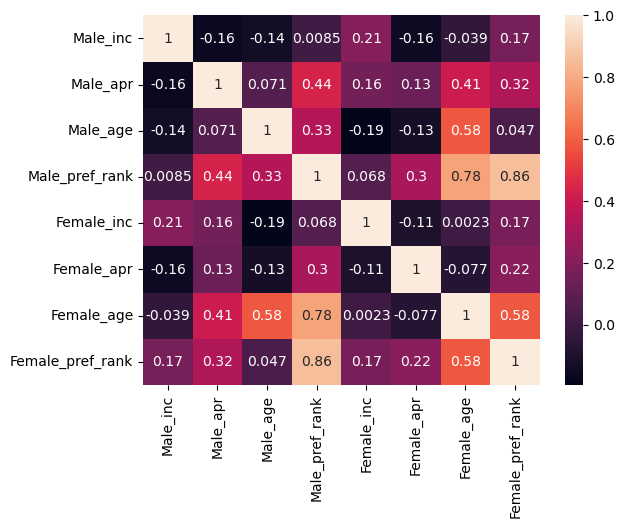

In [23]:
df_for_corr = df[["Male_inc", "Male_apr", "Male_age", "Male_pref_rank", "Female_inc", "Female_apr", "Female_age", "Female_pref_rank"]]
columns_to_negate = ["Male_age", "Male_pref_rank", "Female_age", "Female_pref_rank"]
df_for_corr.loc[:, columns_to_negate] = -df_for_corr.loc[:, columns_to_negate]
df_corr = df_for_corr.corr()
sns.heatmap(df_corr, annot=True)

In [32]:
target_columns = ["Male_inc", "Male_apr", "Male_age", "Male_pref_rank", "Female_inc", "Female_apr", "Female_age", "Female_pref_rank"]
df.loc[:, target_columns].groupby("Male_inc").mean()

,Male_apr,Male_age,Male_pref_rank,Female_inc,Female_apr,Female_age,Female_pref_rank
Male_inc,,,,,,,
1,5.500000,4.500000,32.750000,3.250000,6.500000,5.500000,22.750000
2,5.882353,3.764706,13.705882,3.529412,5.176471,3.647059,12.235294
4,6.125000,3.750000,15.125000,4.000000,5.750000,3.250000,9.125000
6,5.631579,5.157895,20.631579,4.315789,5.000000,4.736842,11.526316
8,3.500000,2.500000,7.500000,4.000000,5.000000,2.500000,3.500000


In [3]:
df.groupby("Female_apr").mean()

,Male,Female,Male_inc
Female_apr,,,
1,22.000000,12.000000,6.000000
2,41.000000,7.000000,6.000000
3,20.500000,20.750000,4.000000
4,22.600000,31.400000,4.000000
5,21.705882,29.176471,4.235294
6,29.000000,22.230769,3.692308
7,17.833333,18.333333,3.000000
8,44.000000,33.500000,5.000000
9,26.000000,4.000000,4.000000
